## Random Forest model for Machine Learning 
- Decision tree Algorithm
- Splits due to entropy gain 
- Class labels are assigned on a leafe node 
- Slight change in the data set changes the whole tree 
- Sensitive to the training data 
- Therefore model fails to generalize 
- Any unknown value prediction may effeted 
- The solution is Random Forest making multiple decision tress 



In [12]:
# Bootstrapping + Aggregation = Bagging 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score


In [4]:
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [5]:
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
model = RandomForestClassifier()
model.fit(X,y)


RandomForestClassifier()

In [27]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 2, 2, 1, 0, 2])

In [21]:
score = accuracy_score(y_test,y_predict)
score

1.0

In [29]:
from sklearn import  metrics
cm = metrics.confusion_matrix(y_test,y_predict)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


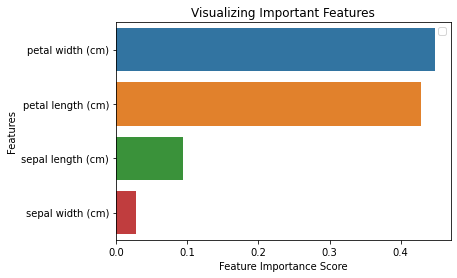

In [24]:
feature_imp = pd.Series(model.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Accuracy Score :1.0')

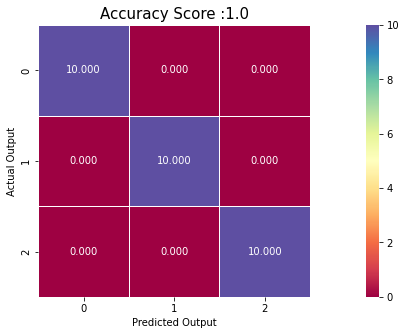

In [32]:
import seaborn as sns
plt.figure(figsize=(20,5)) 
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Spectral")
plt.ylabel("Actual Output")
plt.xlabel("Predicted Output")
all_sample_title = 'Accuracy Score :{0}'.format(score)
plt.title(all_sample_title, size = 15)